### Cleaning and preprocessing the data for NLP analysis
Dataset: Tweets_2020_11-March-7-June_workfromhome_all.csv => 29153 records

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re
import contractions
from nltk.tokenize import word_tokenize
import os
from sentistrength import PySentiStr
import calendar
import wordcloud

##### Import the raw dataset

In [2]:
raw_dataset = pd.read_csv('Tweets_2020_11-March-7-June_workfromhome_all.csv')
print(raw_dataset.shape)
raw_dataset.head()

(29147, 18)


,Category,Keyword,Web_Page_URL,Tweet_Website,Author_Name,Author_Web_Page_URL,Tweet_Timestamp,Tweet_Time,Tweet_Content,Tweet_Image_URL,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews,Retweet_or_not,Retweet_Original_Tweet_Content,Retweet_Original_Tweet_Poster,Retweet_Original_Tweet_Time,Retweet_Original_Tweet_PosterID
0,Post,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/TheWritingFitz/status/1237...,NaN,https://twitter.com/TheWritingFitz,1.580000e+12,11-03-20 00:14,@CWAUnion\n Is the union able to take measures...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
1,Post,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/digitalkg/status/123753446...,NaN,https://twitter.com/digitalkg,1.580000e+12,11-03-20 00:23,I’m looking forward to working from home a lot...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
2,Post,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/LukeZhang5/status/12375345...,NaN,https://twitter.com/LukeZhang5,1.580000e+12,11-03-20 00:23,China team work from home more than 1 month al...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
3,Post,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/Adamhill1212/status/123753...,NaN,https://twitter.com/Adamhill1212,1.580000e+12,11-03-20 00:39,We are about to find out how much work could h...,NaN,363,28,14.0,No,NaN,NaN,NaN,NaN
4,Post,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/kennethdashen/status/12375...,@kennethdashen,https://twitter.com/kennethdashen,1.580000e+12,11-03-20 00:45,Folks who can't #WorkFromHome probably hate th...,NaN,1,NaN,NaN,No,NaN,NaN,NaN,NaN


In [3]:
# Populate the Author_Name column

raw_dataset['Author_Name'] = raw_dataset['Author_Web_Page_URL'].apply(lambda x: '@' + re.findall(r'https://twitter.com/(\w+)', x)[0])

In [4]:
# Check how many unique values are in each column of the dataset
raw_dataset.nunique()

Category                               2
Keyword                               98
Web_Page_URL                         187
Tweet_Website                      29073
Author_Name                        24126
Author_Web_Page_URL                24126
Tweet_Timestamp                        2
Tweet_Time                         23004
Tweet_Content                      29147
Tweet_Image_URL                      248
Tweet_Number_of_Likes                439
Tweet_Number_of_Retweets             181
Tweet_Number_of_Reviews              105
Retweet_or_not                         1
Retweet_Original_Tweet_Content         0
Retweet_Original_Tweet_Poster          0
Retweet_Original_Tweet_Time            0
Retweet_Original_Tweet_PosterID        0
dtype: int64

Check how many NaN values are in each column of the dataset and their percentage

In [5]:
print("Missing values percentage: \n")

# Calculate the maximum length of the column names
coloane = raw_dataset.columns.to_list()
max_col_len = max([len(str(col)) for col in coloane])

# Define the formatting string with a dynamic width for the column name field
fmt_str = '{:<{}}  {:>5}  {:.4f}%'

# Iterate over the columns and print the missing values percentage for each one
for c in coloane:
    if c != 'tconst':
        num_missing = len(raw_dataset[raw_dataset[c].isna()])
        percent_missing = num_missing / len(raw_dataset) * 100
        print(fmt_str.format(c, max_col_len, num_missing, percent_missing))
    else:
        num_missing = len(raw_dataset[raw_dataset[c].isna()])
        percent_missing = num_missing / len(raw_dataset) * 100
        print(fmt_str.format(c, max_col_len + 8, num_missing, percent_missing))

Missing values percentage: 

Category                             0  0.0000%
Keyword                              0  0.0000%
Web_Page_URL                         0  0.0000%
Tweet_Website                        0  0.0000%
Author_Name                          0  0.0000%
Author_Web_Page_URL                  0  0.0000%
Tweet_Timestamp                      0  0.0000%
Tweet_Time                           0  0.0000%
Tweet_Content                        0  0.0000%
Tweet_Image_URL                  28882  99.0908%
Tweet_Number_of_Likes            10222  35.0705%
Tweet_Number_of_Retweets         20278  69.5715%
Tweet_Number_of_Reviews          18689  64.1198%
Retweet_or_not                       0  0.0000%
Retweet_Original_Tweet_Content   29147  100.0000%
Retweet_Original_Tweet_Poster    29147  100.0000%
Retweet_Original_Tweet_Time      29147  100.0000%
Retweet_Original_Tweet_PosterID  29147  100.0000%


In [6]:
# Drop the unnecessary columns from the dataset
raw_dataset.drop(['Category','Tweet_Timestamp','Tweet_Image_URL','Retweet_or_not','Retweet_Original_Tweet_Content', 'Retweet_Original_Tweet_Poster', 'Retweet_Original_Tweet_Time', 'Retweet_Original_Tweet_PosterID'], 
                     axis=1, inplace=True)

In [7]:
# Replace NaN values with zeros for Tweet Number of Likes, Retweets and Reviews
raw_dataset[["Tweet_Number_of_Likes","Tweet_Number_of_Retweets", "Tweet_Number_of_Reviews"]] = raw_dataset[["Tweet_Number_of_Likes","Tweet_Number_of_Retweets", "Tweet_Number_of_Reviews"]].fillna(0)
raw_dataset.head()

,Keyword,Web_Page_URL,Tweet_Website,Author_Name,Author_Web_Page_URL,Tweet_Time,Tweet_Content,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews
0,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/TheWritingFitz/status/1237...,@TheWritingFitz,https://twitter.com/TheWritingFitz,11-03-20 00:14,@CWAUnion\n Is the union able to take measures...,0,0,0.0
1,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/digitalkg/status/123753446...,@digitalkg,https://twitter.com/digitalkg,11-03-20 00:23,I’m looking forward to working from home a lot...,0,0,0.0
2,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/LukeZhang5/status/12375345...,@LukeZhang5,https://twitter.com/LukeZhang5,11-03-20 00:23,China team work from home more than 1 month al...,0,0,0.0
3,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/Adamhill1212/status/123753...,@Adamhill1212,https://twitter.com/Adamhill1212,11-03-20 00:39,We are about to find out how much work could h...,363,28,14.0
4,(#workfromhome) lang:en until:2020-03-12 since...,https://twitter.com/search?q=(%23workfromhome)...,https://twitter.com/kennethdashen/status/12375...,@kennethdashen,https://twitter.com/kennethdashen,11-03-20 00:45,Folks who can't #WorkFromHome probably hate th...,1,0,0.0


In [8]:
# Check the datatypes of the columns
raw_dataset.dtypes

Keyword                      object
Web_Page_URL                 object
Tweet_Website                object
Author_Name                  object
Author_Web_Page_URL          object
Tweet_Time                   object
Tweet_Content                object
Tweet_Number_of_Likes        object
Tweet_Number_of_Retweets     object
Tweet_Number_of_Reviews     float64
dtype: object

In [9]:
def process_string(value):
    value = value.replace(",", '')
    value = value.replace('.', '')
    value = value.replace('K', '000')

    return value

In [10]:
raw_dataset['Tweet_Number_of_Likes'] = pd.to_numeric(raw_dataset['Tweet_Number_of_Likes'].apply(lambda x: process_string(x) if isinstance(x, str) else x)).astype('Int64')
raw_dataset['Tweet_Number_of_Retweets'] = pd.to_numeric(raw_dataset['Tweet_Number_of_Retweets'].apply(lambda x: process_string(x) if isinstance(x, str) else x)).astype('Int64')
raw_dataset['Tweet_Number_of_Reviews'] = pd.to_numeric(raw_dataset['Tweet_Number_of_Reviews'].apply(lambda x: process_string(x) if isinstance(x, str) else x)).astype('Int64')

In [11]:
raw_dataset['Tweet_Time'] = pd.to_datetime(raw_dataset['Tweet_Time'], format='%d-%m-%y %H:%M')

### Functions to preprocess the Tweets for sentiment analysis

In [12]:
def custom_stop_words(path_to_stopwords):
    """Function to read a .txt file containing (custom) stop words and return a set of these stop words.
    Args:
        path_to_stopwords (str): path to the.txt file containing stop words (e.g. /your/path/to/files/stop_words.txt)
    Returns:
        set: set of stop words
    """    
    stop_words = set()
    with open(path_to_stopwords, 'r') as f:
        for line in f:
            word = line.strip()  # remove whitespace and newline characters
            stop_words.add(word)
    return stop_words


def remove_emoji(text):
    """Function that takes a text string as input and uses a regular expression pattern to match all Unicode characters
    that are classified as emojis. The regular expression includes different ranges of Unicode characters 
    that represent different types of emojis, such as emoticons, symbols, and flags.
    Args:
        text (str): text string to remove emojis from
    Returns:
        str: text string with all emojis removed
    """    
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)


def remove_stopwords(text, stop_words):
    """Function that removes stop words from a given text.
    Args:
        text (str): text string
        stop_words (set): set of stop words
    Returns:
        str: text string without stop words
    """    
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove the stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join the filtered tokens back into a string
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text


def clean_text(text, stop_words):
    """Function to clean the raw text, e.g. from a tweet. Performs the following steps:
    1. Lowercase all the words in the text
    2. Replace all new line characters with a white space
    3. Remove tags
    4. Remove URLs
    5. Convert contractions to their full forms
    6. Remove punctuations
    7. Remove emojis (emoticons, symbols, flags, etc.)
    8. Remove stopwords
    Args:
        text (str): text string to be cleaned before passing it to the sentiment analysis model
        stop_words (set): set of stop words to be removed from the text
    Returns:
        str: cleaned text string
    """        
    # 1. Lowercase all words in the text
    text = text.lower()

    # 2. Replace the new line character with empty string
    text = text.replace("\n", "")
    
    # 3. Remove words starting with '@' - tags (most common noise in replies)
    text = re.sub(r'@\w+', '', text, flags=re.MULTILINE)

    # 4. Remove words starting with 'http' - hyperlinks
    text = re.sub(r'http\S+|www.\S+', '', text, flags=re.MULTILINE)

    # 5. Remove contractions, such as you're => you are
    contractions.fix(text)

    # 6. Remove punctuation from the text using regular expressions
    text = re.sub(r'[^\w\s]', '', text)

    # 7. Remove emojis
    text = remove_emoji(text)

    # 8. Remove stopwords in English
    text = remove_stopwords(text, stop_words)

    return text

#### Populating the set of stop words from the text file

In [13]:
# Getting the path to the root directory of the filesystem
root_dir = os.getcwd()

In [14]:
stopwords = custom_stop_words(os.path.join(root_dir,'stopwords.txt'))
stopwords

{'an',
 'and',
 'at',
 'been',
 'being',
 'had',
 'it',
 'its',
 'o',
 'of',
 'or',
 'so',
 "that'll",
 'the',
 'this',
 'to',
 'which',
 'y'}

### Setup for SentiStrength library

In [15]:
path_to_sentistrength = os.path.join(root_dir, 'SentiStrength')
# Replace with the path to the Java executable file of SentiStrength.
path_to_sentistrength_jar = os.path.join(path_to_sentistrength, 'SentiStrengthCom.jar')
# Replace with the path to the language folder, which is used along with the .jar file to compute sentiment scores.
path_to_sentistrength_language_folder = os.path.join(path_to_sentistrength, 'LanguageFolder')

In [16]:
senti = PySentiStr()
senti.setSentiStrengthPath(path_to_sentistrength_jar)
senti.setSentiStrengthLanguageFolderPath(path_to_sentistrength_language_folder)

In [17]:
# create a new dataframe with the desired columns for sentiment analysis, initializing empty columns for Cleaned_Tweet, Sentiment_Score, and Dual_Score
new_dataset = pd.DataFrame({
    'Tweet_Time': raw_dataset['Tweet_Time'],
    'Tweet_Content': raw_dataset['Tweet_Content'],
    'Tweet_Number_of_Likes': raw_dataset['Tweet_Number_of_Likes'],
    'Tweet_Number_of_Retweets': raw_dataset['Tweet_Number_of_Retweets'],
    'Tweet_Number_of_Reviews': raw_dataset['Tweet_Number_of_Reviews']
})
new_dataset.head()


,Tweet_Time,Tweet_Content,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews
0,2020-03-11 00:14:00,@CWAUnion\n Is the union able to take measures...,0,0,0
1,2020-03-11 00:23:00,I’m looking forward to working from home a lot...,0,0,0
2,2020-03-11 00:23:00,China team work from home more than 1 month al...,0,0,0
3,2020-03-11 00:39:00,We are about to find out how much work could h...,363,28,14
4,2020-03-11 00:45:00,Folks who can't #WorkFromHome probably hate th...,1,0,0


In [18]:
# Insert a new column 'Cleaned_Tweet' immediately after column 'Tweet_Content'
new_dataset.insert(new_dataset.columns.get_loc('Tweet_Content')+1, 'Cleaned_Tweet', new_dataset['Tweet_Content'].apply(lambda x: clean_text(x, stopwords)))

In [19]:
# # create a new dataframe with the desired columns for sentiment analysis, initializing empty columns for Cleaned_Tweet, Sentiment_Score, and Dual_Score
# new_dataset = pd.DataFrame({
#     'Tweet_Time': raw_dataset['Tweet_Time'],
#     'Tweet_Content': raw_dataset['Tweet_Content'],
#     'Cleaned_Tweet': [''] * len(raw_dataset), # initializing empty values for Cleaned_Tweet
#     'Sentiment_Score': [0] * len(raw_dataset), # initializing empty values for Sentiment_Score
#     'Binary_Score': [0] * len(raw_dataset), # initializing empty values for Binary_Score
#     'Tweet_Number_of_Likes': raw_dataset['Tweet_Number_of_Likes'],
#     'Tweet_Number_of_Retweets': raw_dataset['Tweet_Number_of_Retweets'],
#     'Tweet_Number_of_Reviews': raw_dataset['Tweet_Number_of_Reviews']
# })
# new_dataset.head()


In [20]:
new_dataset

,Tweet_Time,Tweet_Content,Cleaned_Tweet,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews
0,2020-03-11 00:14:00,@CWAUnion\n Is the union able to take measures...,is union able take measures in getting deal wi...,0,0,0
1,2020-03-11 00:23:00,I’m looking forward to working from home a lot...,im looking forward working from home a lot bec...,0,0,0
2,2020-03-11 00:23:00,China team work from home more than 1 month al...,china team work from home more than 1 month al...,0,0,0
3,2020-03-11 00:39:00,We are about to find out how much work could h...,we are about find out how much work could have...,363,28,14
4,2020-03-11 00:45:00,Folks who can't #WorkFromHome probably hate th...,folks who cant workfromhome probably hate i fe...,1,0,0
...,...,...,...,...,...,...
29142,2020-06-07 22:19:00,She said I can work from home by updating inve...,she said i can work from home by updating inve...,6,0,2
29143,2020-06-07 23:03:00,CLTCC’s 8 Campuses will be open for regular op...,cltccs 8 campuses will be open for regular ope...,4,6,0
29144,2020-06-07 23:10:00,S/O to \n@jeremyrosenthal\n & the \n@CoSIDAnew...,goodwill wellness committee for adding team as...,12,1,1
29145,2020-06-07 23:30:00,"FORTUNE COOKIE: ""Be prepared to lend a hand to...",fortune cookie be prepared lend a hand a cowor...,10,0,1


Convert string to tuple

In [21]:
import ast

# define a string with mixed types
s = '(2, -1)'

# use ast.literal_eval() to convert the string to a tuple with the correct types
t = ast.literal_eval(s)

print(t)
print(type(t))

(2, -1)
<class 'tuple'>


Add sentiment columns to dataframe

In [22]:
def compute_sentiment_scores(df):
    return {
        'scale': senti.getSentiment(df['Cleaned_Tweet']),
        'binary': senti.getSentiment(df['Cleaned_Tweet'], score='binary'),
        'dual': senti.getSentiment(df['Cleaned_Tweet'], score='dual')
    }

In [23]:
def add_sentiment_columns(df, scores_dict):
    df.insert(df.columns.get_loc('Cleaned_Tweet')+1, 'Scale_Sentiment', scores_dict['scale'])
    df.insert(df.columns.get_loc('Scale_Sentiment')+1, 'Binary_Sentiment', scores_dict['binary'])
    df.insert(df.columns.get_loc('Binary_Sentiment')+1, 'Dual_Sentiment', scores_dict['dual'])

In [24]:
add_sentiment_columns(new_dataset, compute_sentiment_scores(new_dataset))

In [25]:
new_dataset

,Tweet_Time,Tweet_Content,Cleaned_Tweet,Scale_Sentiment,Binary_Sentiment,Dual_Sentiment,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews
0,2020-03-11 00:14:00,@CWAUnion\n Is the union able to take measures...,is union able take measures in getting deal wi...,1,1,"(2, -1)",0,0,0
1,2020-03-11 00:23:00,I’m looking forward to working from home a lot...,im looking forward working from home a lot bec...,0,1,"(2, -2)",0,0,0
2,2020-03-11 00:23:00,China team work from home more than 1 month al...,china team work from home more than 1 month al...,0,1,"(1, -1)",0,0,0
3,2020-03-11 00:39:00,We are about to find out how much work could h...,we are about find out how much work could have...,1,1,"(2, -1)",363,28,14
4,2020-03-11 00:45:00,Folks who can't #WorkFromHome probably hate th...,folks who cant workfromhome probably hate i fe...,-1,-1,"(3, -4)",1,0,0
...,...,...,...,...,...,...,...,...,...
29142,2020-06-07 22:19:00,She said I can work from home by updating inve...,she said i can work from home by updating inve...,-2,-1,"(2, -4)",6,0,2
29143,2020-06-07 23:03:00,CLTCC’s 8 Campuses will be open for regular op...,cltccs 8 campuses will be open for regular ope...,2,1,"(3, -1)",4,6,0
29144,2020-06-07 23:10:00,S/O to \n@jeremyrosenthal\n & the \n@CoSIDAnew...,goodwill wellness committee for adding team as...,1,1,"(3, -2)",12,1,1
29145,2020-06-07 23:30:00,"FORTUNE COOKIE: ""Be prepared to lend a hand to...",fortune cookie be prepared lend a hand a cowor...,0,1,"(1, -1)",10,0,1


Distributie a tweet-urilor pe ore - Martie, Aprilie, Mai, Iunie.

In [26]:
def time_distribution(df, month):
    if not isinstance(month, int) or not 1 <= month <= 12:
        # raise a ValueError if the input is invalid
        raise ValueError("Invalid input: month must be an integer between 1 and 12")

    hours = [ date.hour for date in df['Tweet_Time'] if date.month == month ]
    
    hours.sort()
    hours_series = pd.Series(hours)
    distribution = hours_series.value_counts()[hours_series.unique()]
    
    return distribution.to_dict()

In [27]:
def sorted_plot_labels_from_dict(dictionary):
        """Function that returns the sorted labels for a plot from a dictionary

        Args:
            dictionary (dict): dictionary ready to be plotted in th shape of a bar chart, 
            where the keys represent the x-axis and the values represent the y-axis

        Returns:
            tuple: the sorted lists of x and y-values for the plot
        """        
        # sort the dictionary by keys
        sorted_dict = sorted(dictionary.items())

        # extract the sorted keys and values
        sorted_x = [k for k, v in sorted_dict]
        sorted_y = [v for k, v in sorted_dict]

        return sorted_x, sorted_y

In [28]:
# function to add value labels - adds the value of y
def add_labels_y_value(x,y):
    """Function that takes the x and y-axis to be passed onto a plot function and generates labels,
    such that on top of each y value, it is displayed centrally.

    Args:
        x (list): list of labels for x-axis of a plot
        y (list): list of values for y-axis of a plot
    """    
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [29]:
def plot_time_distribution_event(df, month): 
    distribution = time_distribution(df, month)
    # create a dictionary to map numerical month values to month names
    month_names = dict(enumerate(calendar.month_name))

    # get the corresponding month name
    month_name = month_names.get(month)
    
    sorted_posting_hours, sorted_counts = sorted_plot_labels_from_dict(distribution)

    plt.bar(range(len(distribution)), sorted_counts, tick_label=sorted_posting_hours)
    # Rotate the x-axis labels by 45 degrees
    plt.xticks(rotation=45)
    # calling the function to add value labels - exact number of reactions
    add_labels_y_value(sorted_posting_hours, sorted_counts)
    plt.title(f"Distribution of tweets per hour", loc="center", pad=10)
    plt.xlabel("Posting hour of tweet")
    plt.ylabel(f"Number of tweets")

    # TODO: change folder path to whatever you like
    folder_path = root_dir

    plt.savefig(os.path.join(folder_path, f'{month_name}_distribution.png'))
    plt.close()

In [30]:
plot_time_distribution_event(new_dataset, 3)

Din coloana Scale_Sentiment, determinam valoarea absoluta a fiecarei valori unice.

In [31]:
score_counts = new_dataset['Scale_Sentiment'].value_counts()

In [32]:
# TODO: change folder path to whatever you like
folder_path = root_dir

In [33]:
sorted_posting_hours, sorted_score_counts = sorted_plot_labels_from_dict(score_counts)

plt.bar(range(len(score_counts)), sorted_score_counts, tick_label=sorted_posting_hours)
# Rotate the x-axis labels by 45 degrees
# plt.xticks(rotation=45)
# calling the function to add value labels - exact number of reactions
# add_labels_y_value(sorted_posting_hours, sorted_score_counts)
plt.title(f"Distribution of tweets per hour", loc="center", pad=10)
plt.xlabel("Sentiment score")
plt.ylabel(f"Number of tweets")

plt.savefig(os.path.join(folder_path, f'score_distribution.png'))
plt.close()

Din coloana Scale_Sentiment, determinam procentul fiecarei valori unice.

In [34]:
value_counts = new_dataset['Scale_Sentiment'].value_counts(normalize=True) * 100

In [35]:
value_counts

Scale_Sentiment
 0    42.378289
 1    20.056953
-1    15.349779
 2    12.042406
-2     6.374584
-3     2.315847
 3     1.276289
-4     0.144097
 4     0.061756
Name: proportion, dtype: float64

Din coloana Binary_Sentiment, determinam procentul fiecarei valori unice.

In [36]:
value_counts = new_dataset['Binary_Sentiment'].value_counts(normalize=True) * 100

In [37]:
value_counts

Binary_Sentiment
 1    75.815693
-1    24.184307
Name: proportion, dtype: float64

In [38]:
# Data to plot
labels = value_counts.index.tolist()
sizes = value_counts.to_list()  # percentages

# Create a pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title to the chart
ax1.set_title('Binary score distribution')

# Show the chart
# plt.show()

plt.savefig(os.path.join(folder_path, f'binary_score_pie.png'))
plt.close()

Scatter plot - scale sentiment(x) and number of likes(y)

In [39]:
def remove_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return [x for x in data if x >= lower_bound and x <= upper_bound]

In [40]:
df_filtered = new_dataset[new_dataset['Tweet_Number_of_Likes'] != 0]

In [41]:
df_filtered = df_filtered[df_filtered['Tweet_Number_of_Likes'].isin(remove_outliers(df_filtered['Tweet_Number_of_Likes'].to_list()))]

In [42]:
x_labels = df_filtered['Scale_Sentiment'].to_list()

In [43]:
y_labels = df_filtered['Tweet_Number_of_Likes'].to_list()

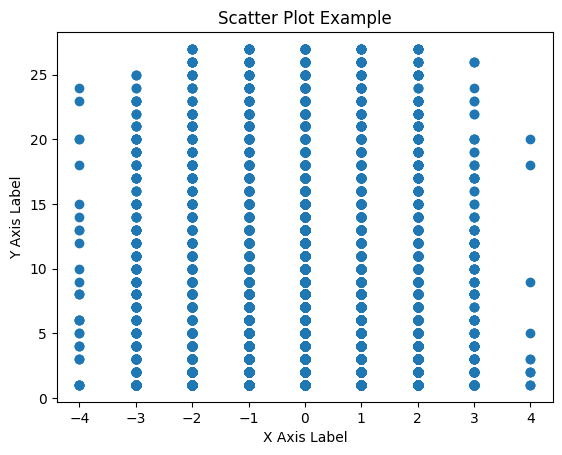

In [44]:
import matplotlib.ticker as mtick

# Create scatter plot
plt.scatter(x_labels, y_labels)

# set y-axis label format to integers
fmt = '%.0f'
yticks = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

# Set plot title and axis labels
plt.title('Scatter Plot Example')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')

# Show the plot
plt.show()

TODO: word clouds

In [45]:
df_filtered = new_dataset[new_dataset['Scale_Sentiment'].isin([-2, -3, -4])]

In [46]:
df_filtered

,Tweet_Time,Tweet_Content,Cleaned_Tweet,Scale_Sentiment,Binary_Sentiment,Dual_Sentiment,Tweet_Number_of_Likes,Tweet_Number_of_Retweets,Tweet_Number_of_Reviews
17,2020-03-11 02:28:00,Call your Reps and Senators and Demand a rapid...,call your reps senators demand a rapid increas...,-2,-1,"(1, -3)",0,0,0
24,2020-03-11 02:58:00,#StopLargeGatherings\n#WorkFromHome \n#CloseTh...,stoplargegatheringsworkfromhome closetheschool...,-2,-1,"(1, -3)",2,0,0
25,2020-03-11 03:02:00,Do not stay #broke. Let us help #you start a #...,do not stay broke let us help you start a newl...,-2,-1,"(1, -3)",0,0,0
43,2020-03-11 08:02:00,The financial services company I work for has ...,financial services company i work for has told...,-2,-1,"(1, -3)",0,0,0
67,2020-03-11 11:24:00,Everyone is worried about the coronavirus and ...,everyone is worried about coronavirus im just ...,-2,-1,"(2, -4)",1,0,0
...,...,...,...,...,...,...,...,...,...
29116,2020-06-07 17:42:00,let me just wait out this corona shit bitch ca...,let me just wait out corona shit bitch cause i...,-2,-1,"(1, -3)",6,0,2
29119,2020-06-07 18:29:00,I am acutely aware of what is happening to SME...,i am acutely aware what is happening smes trag...,-2,-1,"(1, -3)",33,5,1
29125,2020-06-07 19:25:00,"Fear of not doing enough work from home, guilt...",fear not doing enough work from home guilt abo...,-2,-1,"(2, -4)",69,5,4
29130,2020-06-07 20:17:00,The truly scary thing about extended work from...,truly scary thing about extended work from hom...,-2,-1,"(2, -4)",40,6,5


In [47]:
all_negative_tweets = new_dataset['Cleaned_Tweet'].str.cat(sep=' ')

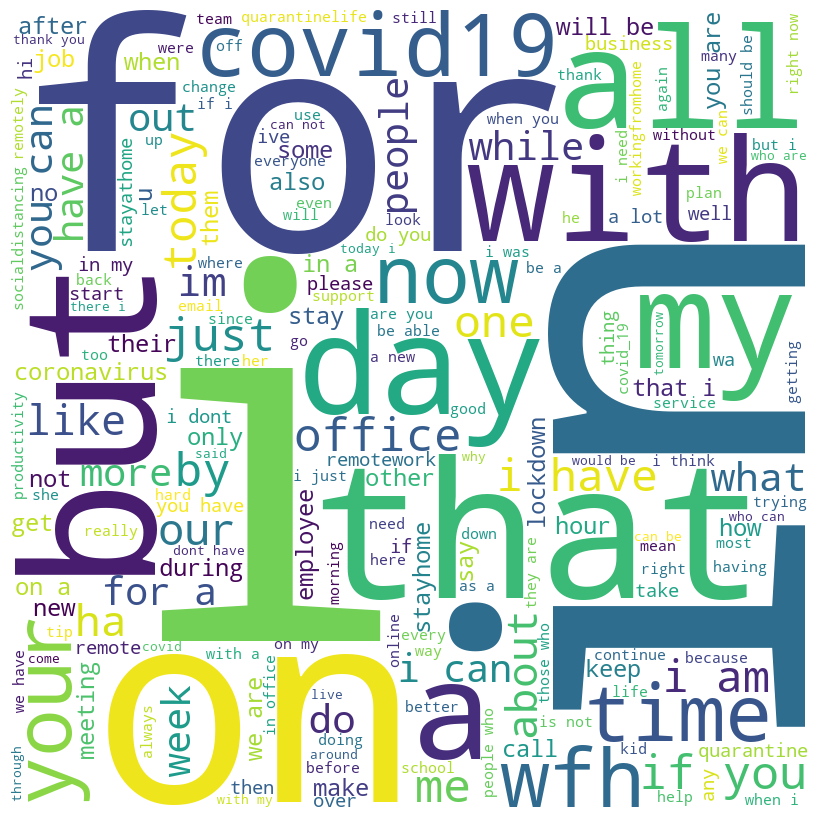

In [48]:
stopwords = ['workfromhome', 'work', 'from', 'home', 'working']
# Create the word cloud object
wordcl = wordcloud.WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(all_negative_tweets)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcl)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()